In [1]:
import pandas as pd
import datetime
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor, BaggingRegressor, GradientBoostingRegressor, AdaBoostRegressor
from sklearn.neighbors import KNeighborsRegressor

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import numpy as np
from sklearn.linear_model import Ridge, LinearRegression, Lasso, RidgeCV, LassoCV
from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler, Normalizer
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.pipeline import make_pipeline
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
%matplotlib inline
# plt.style.use("ggplot")
sns.set_style("darkgrid")

In [3]:
data = pd.read_csv("../clean_data/FinalData_for_Models.csv")

In [4]:
data.rename(columns={'Unnamed: 0':'pickup_time'}, inplace=True)

In [5]:
data.shape

(30647, 17)

In [6]:
data = data[data["missing_dt"]==False]

In [7]:
data.shape

(26230, 17)

In [8]:
data.head()

,pickup_time,num_pickups,num_passengers,missing_dt,temp,temp_min,temp_max,humidity,wind_speed,weather_main,weather_description,Passengers,Month,Hour,Day,holiday,precip_in
0,2014-01-01 00:00:00-05:00,107.0,210.0,False,269.27,267.59,270.93,80.0,3.0,clear,sky is clear,108.0,1,0,2,True,0.0
1,2014-01-01 01:00:00-05:00,34.0,45.0,False,268.90,267.04,270.93,80.0,2.0,clear,sky is clear,0.0,1,1,2,True,0.0
2,2014-01-01 02:00:00-05:00,34.0,70.0,False,268.48,266.48,270.37,57.0,3.0,clear,sky is clear,0.0,1,2,2,True,0.0
3,2014-01-01 03:00:00-05:00,12.0,18.0,False,268.33,265.93,270.37,80.0,3.0,clear,sky is clear,0.0,1,3,2,True,0.0
4,2014-01-01 04:00:00-05:00,25.0,37.0,False,268.10,265.37,270.37,80.0,3.0,clear,sky is clear,0.0,1,4,2,True,0.0


In [9]:
data.weather_main.unique()

array(['clear', 'snow', 'fog', 'snow,fog', 'rain,snow,fog', 'rain,snow',
       'rain', 'rain,fog', 'clouds,clear', 'clouds', 'rain,clear',
       'clouds,snow', 'clouds,snow,fog', 'clouds,fog', 'rain,clouds,fog',
       'rain,clouds,thunderstorm,fog', 'rain,clouds', 'clear,fog',
       'rain,thunderstorm,fog', 'rain,thunderstorm', 'thunderstorm,fog',
       'thunderstorm', 'fog,clear', 'clouds,thunderstorm,fog',
       'rain,clear,fog', 'rain,clouds,clear', 'clouds,clear,fog',
       'fog,clouds,clear', 'snow,thunderstorm,fog',
       'rain,snow,thunderstorm,fog'], dtype=object)

## Feature Extraction:



 ### Holiday Feature

In [10]:
data['holiday'] = data['holiday'].astype(int)

In [11]:
data.head(2)

,pickup_time,num_pickups,num_passengers,missing_dt,temp,temp_min,temp_max,humidity,wind_speed,weather_main,weather_description,Passengers,Month,Hour,Day,holiday,precip_in
0,2014-01-01 00:00:00-05:00,107.0,210.0,False,269.27,267.59,270.93,80.0,3.0,clear,sky is clear,108.0,1,0,2,1,0.0
1,2014-01-01 01:00:00-05:00,34.0,45.0,False,268.90,267.04,270.93,80.0,2.0,clear,sky is clear,0.0,1,1,2,1,0.0


### Time Feature

In [12]:
data.rename(columns={'Hour':'HourOfDay'}, inplace=True)
data.rename(columns={'Day':'DayOfWeek'}, inplace=True)

In [13]:
data.head(2)

,pickup_time,num_pickups,num_passengers,missing_dt,temp,temp_min,temp_max,humidity,wind_speed,weather_main,weather_description,Passengers,Month,HourOfDay,DayOfWeek,holiday,precip_in
0,2014-01-01 00:00:00-05:00,107.0,210.0,False,269.27,267.59,270.93,80.0,3.0,clear,sky is clear,108.0,1,0,2,1,0.0
1,2014-01-01 01:00:00-05:00,34.0,45.0,False,268.90,267.04,270.93,80.0,2.0,clear,sky is clear,0.0,1,1,2,1,0.0


### Weather Feature 

In [12]:
# snow = data[data["weather_main"]=="Snow"]
# df_snow = pd.get_dummies(snow['weather_description'])
# df_snow.head(10)

In [14]:
temp = data.groupby("weather_main")["num_pickups"].sum()

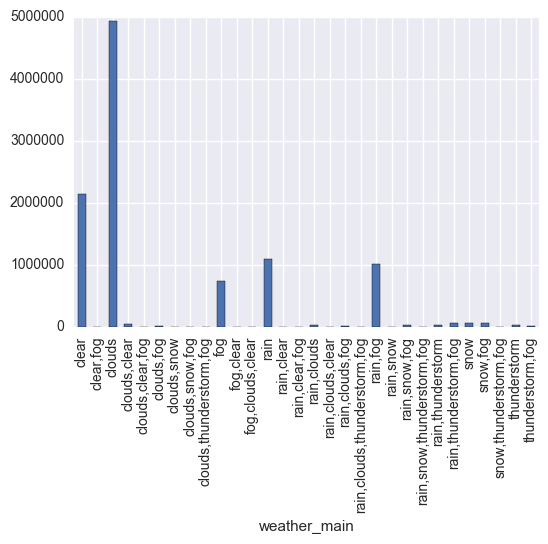

In [15]:
temp.plot(kind="bar")
plt.show()

In [15]:
# data.weather_description.unique()

In [16]:
# data = data.replace({'weather_description' : {'Sky is Clear': 'Clear', 'moderate rain': 'medium rain','sky is clear': 'Clear', 'fog': 'haze', 'heavy intensity rain': 'heavy rain', 
#  'smoke':'haze', 'mist':'haze','light intensity drizzle': 'light rain', 'overcast clouds': 'haze', 
#  'broken clouds': 'heavy rain','scattered clouds': 'Clear', 'snow': 'medium snow', 'few clouds': 'haze', 
#                                        'very heavy rain': 'heavy rain', 'thunderstorm': 'light rain', 'dust': 'haze',
# 'thunderstorm with light rain': 'light rain', 'thunderstorm with heavy rain': 'heavy rain',
# 'thunderstorm with rain': 'medium rain', 'proximity thunderstorm':'Clear','light rain and snow': 'light snow', 
# 'freezing rain': 'heavy rain', 'drizzle': 'light rain','heavy intensity drizzle': 'medium rain', 
# 'shower rain': 'medium rain','light intensity shower rain': 'light rain'}})

In [17]:
# data.weather_description.unique()

In [18]:
column = data.weather_main.astype('category')
weather_column_encoded = column.cat.codes
weather_column_encoded = pd.DataFrame(weather_column_encoded, columns=['weather_encoded'])

In [19]:
data = data.merge(weather_column_encoded, left_index=True, right_index=True)

In [20]:
data.head()

,pickup_time,num_pickups,num_passengers,holiday,temp,temp_min,temp_max,pressure,humidity,wind_speed,wind_deg,weather_main,weather_description,Passengers,Month,HourOfDay,DayOfWeek,weather_encoded
0,2014-01-01 00:00:00-05:00,107,210.0,1,269.27,267.59,270.93,1026.0,80.0,3.0,313.0,Clear,Sky is Clear,108,1,0,2,0
1,2014-01-01 01:00:00-05:00,34,45.0,0,268.90,267.04,270.93,1026.0,80.0,2.0,293.0,Clear,Sky is Clear,0,1,1,2,0
2,2014-01-01 02:00:00-05:00,34,70.0,0,268.48,266.48,270.37,1026.0,57.0,3.0,244.0,Clear,Sky is Clear,0,1,2,2,0
3,2014-01-01 03:00:00-05:00,12,18.0,0,268.33,265.93,270.37,1024.0,80.0,3.0,244.0,Clear,Sky is Clear,0,1,3,2,0
4,2014-01-01 04:00:00-05:00,25,37.0,0,268.10,265.37,270.37,1024.0,80.0,3.0,244.0,Clear,Sky is Clear,0,1,4,2,0


In [21]:
data.weather_encoded.unique()

array([ 0,  9,  5,  7,  4,  8,  6,  2,  1, 10,  3])

### DayOfWeek + Weather Encoded

In [22]:
data["DayofWeek_WeatherEncoded"]=data[['DayOfWeek','weather_encoded']].apply(lambda x: '_'.join(str(i) for i in x), axis=1)

### DayOfWeek + HourOfDay

In [23]:
data["DayofWeek_HourOfDay"]=data[['DayOfWeek','HourOfDay']].apply(lambda x: '_'.join(str(i) for i in x), axis=1)

### DayOfWeek + HourOfDay + Holiday

In [24]:
data["DayofWeek_HourOfDay_Holiday"]=data[['DayOfWeek','HourOfDay', 'holiday']].apply(lambda x: '_'.join(str(i) for i in x), axis=1)

### HourOfDay + PassengersArriving

In [25]:
data["DayofWeek_Passengers"]=data[['DayOfWeek','Passengers']].apply(lambda x: '_'.join(str(i) for i in x), axis=1)

In [26]:
data.columns

Index([u'pickup_time', u'num_pickups', u'num_passengers', u'holiday', u'temp',
       u'temp_min', u'temp_max', u'pressure', u'humidity', u'wind_speed',
       u'wind_deg', u'weather_main', u'weather_description', u'Passengers',
       u'Month', u'HourOfDay', u'DayOfWeek', u'weather_encoded',
       u'DayofWeek_WeatherEncoded', u'DayofWeek_HourOfDay',
       u'DayofWeek_HourOfDay_Holiday', u'DayofWeek_Passengers'],
      dtype='object')

In [27]:
final_data = data.drop(['num_passengers', 'temp_min', 'temp_max', 'pressure', 'humidity', 'wind_speed', 'wind_deg', 
           'weather_main', 'weather_description', 'pickup_time'],axis=1)

In [28]:
final_data.columns

Index([u'num_pickups', u'holiday', u'temp', u'Passengers', u'Month',
       u'HourOfDay', u'DayOfWeek', u'weather_encoded',
       u'DayofWeek_WeatherEncoded', u'DayofWeek_HourOfDay',
       u'DayofWeek_HourOfDay_Holiday', u'DayofWeek_Passengers'],
      dtype='object')

In [29]:
categorical_vars = final_data.describe(include=["object"]).columns
continuous_vars = final_data.describe().columns

In [30]:
categorical_vars

Index([u'DayofWeek_WeatherEncoded', u'DayofWeek_HourOfDay',
       u'DayofWeek_HourOfDay_Holiday', u'DayofWeek_Passengers'],
      dtype='object')

In [31]:
continuous_vars

Index([u'num_pickups', u'holiday', u'temp', u'Passengers', u'Month',
       u'HourOfDay', u'DayOfWeek', u'weather_encoded'],
      dtype='object')

## Correlation:

In [32]:
final_data.columns

Index([u'num_pickups', u'holiday', u'temp', u'Passengers', u'Month',
       u'HourOfDay', u'DayOfWeek', u'weather_encoded',
       u'DayofWeek_WeatherEncoded', u'DayofWeek_HourOfDay',
       u'DayofWeek_HourOfDay_Holiday', u'DayofWeek_Passengers'],
      dtype='object')

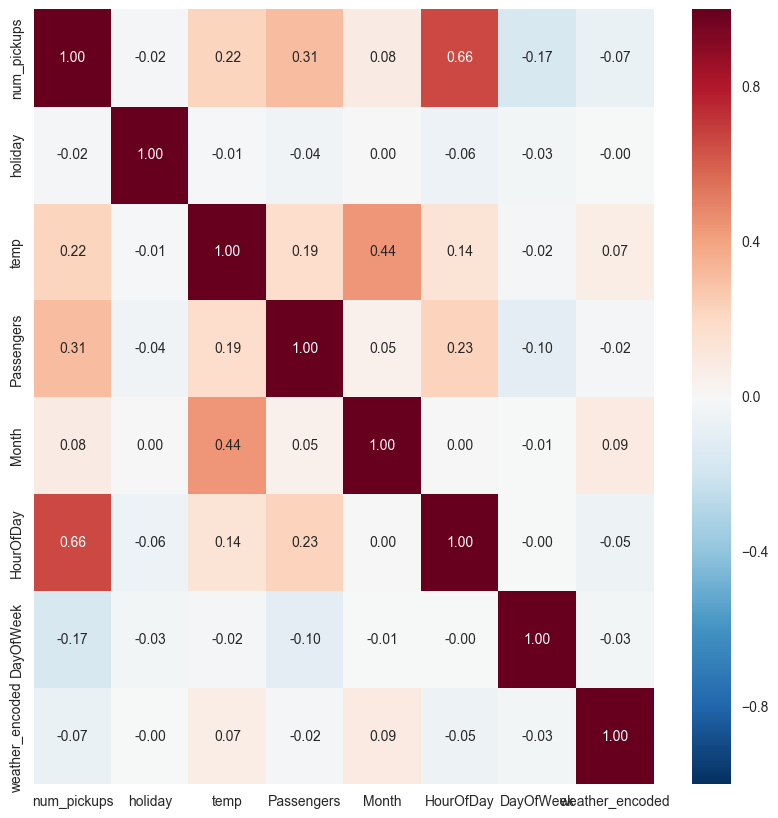

In [33]:
import seaborn as sns
plt.figure(figsize=(10,10))
sns.heatmap(final_data[continuous_vars].corr(),
           annot=True, fmt=".2f")

In [34]:
data_dummies_df = pd.get_dummies(final_data, columns=categorical_vars, drop_first=True)

In [35]:
num_pickups = data_dummies_df.num_pickups
data_dummies_df.drop("num_pickups", axis=1, inplace=True)

In [35]:
X_train, X_test, y_train, y_test = train_test_split(data_dummies_df, num_pickups, random_state=0, test_size=0.2)

## Scaling the Data

In [36]:
scaler = RobustScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)  

## Ridge Regression

In [37]:
model =  Ridge(alpha=np.log(14))
model.fit(X_train, y_train)
score = model.score(X_test, y_test)
print(score)

0.683020466683


## Random Forest Regressor

In [40]:
modelRF = RandomForestRegressor(random_state = 0)
modelRF.fit(X_train, y_train)
scoreRF = modelRF.score(X_test, y_test)
print(scoreRF)

0.719371585746


In [41]:
modelRF_t = RandomForestRegressor(n_jobs=-1, n_estimators=100, max_depth=10, random_state = 0)
modelRF_t.fit(X_train, y_train)
scoreRF_t = modelRF_t.score(X_test, y_test)
print(scoreRF_t)
print(modelRF_t.feature_importances_)

0.727966796202
[  3.46114885e-05   1.93407826e-02   1.65609126e-02 ...,   0.00000000e+00
   1.91319007e-06   0.00000000e+00]


In [48]:
y_tmean = y_train.mean()

In [51]:
y_test.shape

(5201,)

In [42]:
pred = modelRF_t.predict(X_test)

#### Baseline MSE

In [55]:
print("Mean squared error: %.2f"
      % mean_squared_error(y_test, [y_tmean]*len(y_test)))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(y_test, [y_tmean]*len(y_test)))

Mean squared error: 84112.24
Variance score: -0.00


#### Random Forest MSE

In [43]:
from sklearn.metrics import mean_squared_error, r2_score
print("Mean squared error: %.2f"
      % mean_squared_error(y_test, pred))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(y_test, pred))

Mean squared error: 22880.36
Variance score: 0.73


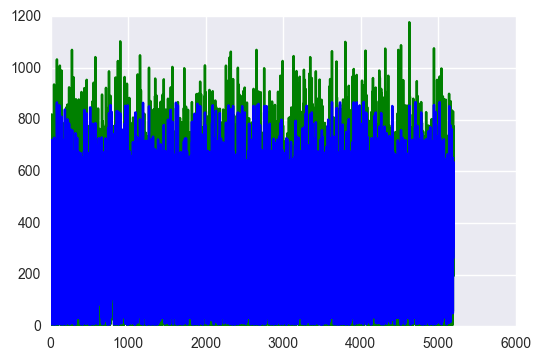

In [47]:
plt.plot(np.arange(5201), y_test, color = 'green')
plt.plot(np.arange(5201), pred, color = 'blue')

## XGBoost

In [ ]:
from xgboost import XGBClassifier
modelXGB = XGBClassifier()
modelXGB.fit(X_train, y_train)
scoreXGB = modelXGB.score(X_test, y_test)
print(scoreXGB)

### TimeSeriesSplit

In [73]:
from sklearn.model_selection import TimeSeriesSplit
X = data_dummies_df
y = num_pickups
tscv = TimeSeriesSplit(n_splits=3)
print(tscv)  
# TimeSeriesSplit(n_splits=2)
for train_index, test_index in tscv.split(X):
    X_train_ts, X_test_ts = X[:len(train_index)], X[len(train_index): (len(train_index)+len(test_index))]
    y_train_ts, y_test_ts = y[(train_index)], y[(test_index)]
    print("x")
    print('Observations: %d' % (len(X_train_ts) + len(X_test_ts)))
    print('Training Observations: %d' % (len(X_train_ts)))
    print('Testing Observations: %d' % (len(X_test_ts)))
    print("y")
    print('Observations: %d' % (len(y_train_ts) + len(y_test_ts)))
    print('Training Observations: %d' % (len(y_train_ts)))
    print('Testing Observations: %d' % (len(y_test_ts)))

TimeSeriesSplit(n_splits=3)
x
Observations: 13003
Training Observations: 6502
Testing Observations: 6501
y
Observations: 13003
Training Observations: 6502
Testing Observations: 6501
x
Observations: 19504
Training Observations: 13003
Testing Observations: 6501
y
Observations: 19504
Training Observations: 13003
Testing Observations: 6501
x
Observations: 26005
Training Observations: 19504
Testing Observations: 6501
y
Observations: 26005
Training Observations: 19504
Testing Observations: 6501


In [84]:
from sklearn.feature_selection import VarianceThreshold
rf_pipe = make_pipeline(RobustScaler(), VarianceThreshold(), RandomForestRegressor(n_jobs=-1, n_estimators=100))
rf_params = {'randomforestregressor__max_depth' : [2,None]}
rf_grid = GridSearchCV(rf_pipe, rf_params, cv=3, scoring='r2')

In [86]:
modelRF_ts = RandomForestRegressor(n_jobs=-1, n_estimators=100, max_depth=2, random_state = 0)
modelRF_ts.fit(X_train_ts, y_train_ts)
scoreRF_ts = modelRF_ts.score(X_test_ts, y_test_ts)
print(scoreRF_ts)
print(modelRF_ts.feature_importances_)

KeyboardInterrupt: 